<a href="https://colab.research.google.com/github/Blackpaper13/Classification_Picture/blob/main/Final_Project_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Chris Yustianto P.T

email : chris321.yusti@gmail.com

Submission Machine Learning Project Final

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-05-02 16:29:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   954KB/s    in 5m 1s   

2021-05-02 16:34:22 (1.02 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

latihan_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  shear_range = 0.2,
                  horizontal_flip=True,
                  fill_mode = 'wrap',
                  validation_split=0.4,)

latihan_generate = latihan_datagen.flow_from_directory(
                    base_dir,
                    class_mode='categorical',
                    target_size=(150, 150),
                    shuffle=True,
                    subset='training')


validasi_generate = latihan_datagen.flow_from_directory(
                              base_dir,
                              target_size=(150, 150),
                              class_mode='categorical',
                              subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

contoh = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

contoh.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'] )

In [ ]:

contoh.fit(
    latihan_generate,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validasi_generate,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 40s - loss: 0.0720 - accuracy: 0.9740 - val_loss: 0.1389 - val_accuracy: 0.9688
Epoch 2/20
25/25 - 40s - loss: 0.0597 - accuracy: 0.9831 - val_loss: 0.0490 - val_accuracy: 0.9750
Epoch 3/20
25/25 - 40s - loss: 0.0416 - accuracy: 0.9870 - val_loss: 0.0357 - val_accuracy: 0.9937
Epoch 4/20
25/25 - 40s - loss: 0.0269 - accuracy: 0.9870 - val_loss: 0.1272 - val_accuracy: 0.9438
Epoch 5/20
25/25 - 40s - loss: 0.0634 - accuracy: 0.9779 - val_loss: 0.2458 - val_accuracy: 0.9500
Epoch 6/20
25/25 - 40s - loss: 0.1475 - accuracy: 0.9506 - val_loss: 0.0963 - val_accuracy: 0.9688
Epoch 7/20
25/25 - 40s - loss: 0.0598 - accuracy: 0.9805 - val_loss: 0.0406 - val_accuracy: 0.9812
Epoch 8/20
25/25 - 41s - loss: 0.0441 - accuracy: 0.9812 - val_loss: 0.0456 - val_accuracy: 0.9812
Epoch 9/20
25/25 - 40s - loss: 0.0344 - accuracy: 0.9896 - val_loss: 0.0310 - val_accuracy: 0.9875
Epoch 10/20
25/25 - 40s - loss: 0.0607 - accuracy: 0.9805 - val_loss: 0.1919 - val_accuracy: 0.9563
Epoch 11/

Saving png-transparent-computer-icons-scissors-hand-scissors-text-hand-technic.png to png-transparent-computer-icons-scissors-hand-scissors-text-hand-technic.png
png-transparent-computer-icons-scissors-hand-scissors-text-hand-technic.png
paper


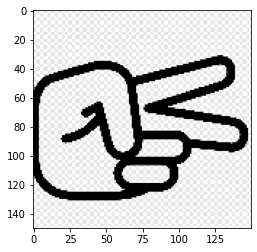

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for cari in uploaded.keys():
  path = cari
  foto = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(foto)
  nilai = image.img_to_array(foto)
  nilai = np.expand_dims(nilai, axis=0)

  images = np.vstack([nilai])
  classes = contoh.predict(images, batch_size=10)

  print(cari)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')